In [1]:
! python --version

Python 3.11.12


In [2]:
# Pythonの量子回路ライブラリ Qiskitを用いて演習を行います。
# QiskitはRustがバックエンドですが、Pythonから呼び出すことができます。
# まずはQiskitをこのjupyter notebook環境にインストールしましょう。Google Colabのまま実行することを想定していますが、ご自身のローカル環境でも同じように動くはずです。
! pip install qiskit[visualization]
! pip install qiskit-ibm-runtime
! pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=fc3d9489fa05e5db80a58da6a527d9f9541d1597c29bfe545f5c8054cf13130f
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

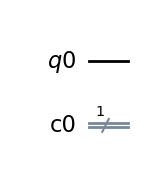

In [3]:
# 早速Qiskitを使って量子回路を作ってみましょう。
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qr = QuantumRegister(1) # 1量子ビットの量子レジスタを用意します。このとき、すべての量子ビットは|0>に初期化されています。
cr = ClassicalRegister(1) # 1ビットの古典レジスタを用意します。

qc = QuantumCircuit(qr, cr) # qrとcrからなるシステムを用意します。
qc.draw(output='mpl') # 作った量子回路を描画してみましょう。

state vector: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


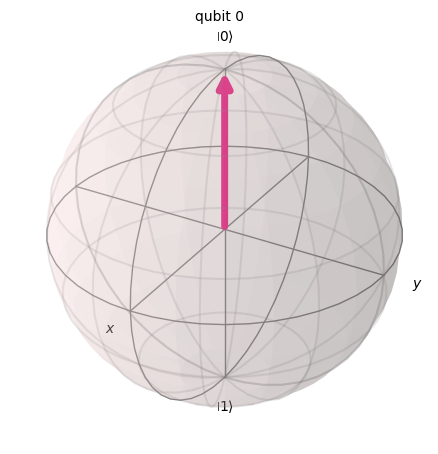

In [4]:
# 量子回路中の量子状態の状態ベクトルを得てみましょう。
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
state = Statevector(qc)
print('state vector: ' + str(state))

# さらに、状態をブロッホ球表示することができます。自分の扱っている量子回路の振る舞いがわからなくなったら適宜このプロットを使ってみてください。
plot_bloch_multivector(state)

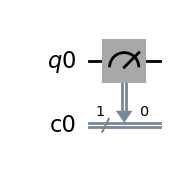

In [5]:
# それでは、量子ビットを測定してみましょう。
qc.measure(qr[0],cr[0]) # 量子ビットを測定します
qc.draw(output='mpl')

In [6]:
# 上の回路を古典計算機でシミュレートしてみましょう。古典出力をサンプリングすることができます。
from qiskit_aer import AerSimulator # ローカル（この場合はgoogle colab上ですが）で量子回路をシミュレートするためのライブラリ
from qiskit import transpile #量子回路のシミュレーション前にトランスパイル（コンパイル）する必要があります。
simulator = AerSimulator() # シミュレータを指定
compiled_circuit = transpile(qc, simulator) # トランスパイル
result = simulator.run(compiled_circuit).result() # 結果
counts = result.get_counts() # 結果のカウント
print(counts)
# {'0': 1024} のような結果が得られるはずです。

{'0': 1024}


量子回路は、量子計算の過程を記述する手法の１つで、基本的な操作を行う量子ゲートを組み合わせて構成されます。まず、いくつかの主要な量子ゲートをご紹介します。
### Xゲート
Xゲートはブロッホ球の$x$軸周りの$\pi$回転です。
|0>にXゲートを適用すると|1>、|1>にXゲートを適用すると|0>になるので、古典のNOTゲートのような操作が実現でき、ビット反転とも呼ばれます。

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

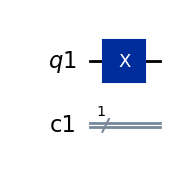

In [7]:
# {'0': 1024} のような結果が得られたはずです。次に、|1>状態を作って古典出力を確かめてみましょう。

qr = QuantumRegister(1) #量子ビットは|0>に初期化されています。
cr = ClassicalRegister(1) # 1ビットの古典レジスタを用意します。

qc = QuantumCircuit(qr, cr) # qrとcrからなるシステムを用意します。
qc.x(qr[0])
qc.draw(output='mpl') # 作った量子回路を描画してみましょう。

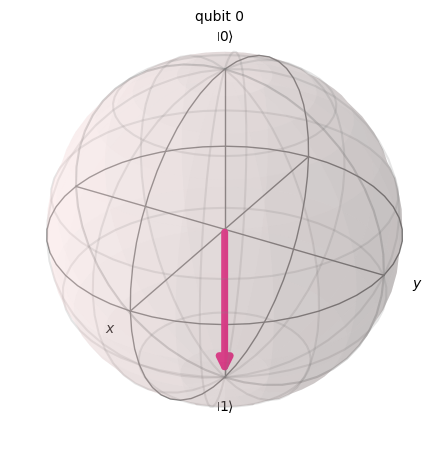

In [8]:
# 量子状態のブロッホ球を見てみましょう
state = Statevector(qc)
plot_bloch_multivector(state)

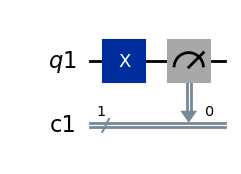

In [9]:
# 無事|1>状態を準備できましたね。それでは先ほどと同様に測定してみます。
qc.measure(qr[0],cr[0]) # 量子ビットを測定します
qc.draw(output='mpl')

In [10]:
def run_qc_on_aer(qc): # 簡単のために回路のシミュレーションを関数にしておきます。自分の書いている量子回路の振る舞いを知りたい時は適宜実行してください。
  simulator = AerSimulator()
  compiled_circuit = transpile(qc, simulator)
  result = simulator.run(compiled_circuit).result()
  counts = result.get_counts()
  return counts

In [11]:
count = run_qc_on_aer(qc)
print(count)

{'1': 1024}


### Yゲート
Yゲートはブロッホ球の$y$軸周りの$\pi$回転です。位相反転とも呼ばれます。

$Z = \begin{pmatrix}
0 & -i \\
i & 0 \\
\end{pmatrix}$

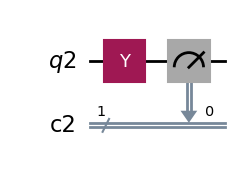

In [12]:
# パウリYゲート
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

qc = QuantumCircuit(qr, cr)
qc.y(qr[0])
qc.measure(qr[0],cr[0])
qc.draw(output='mpl')

In [13]:
run_qc_on_aer(qc)

{'1': 1024}

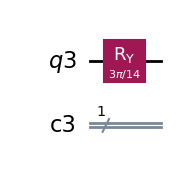

In [14]:
import numpy as np
# パウリYゲート
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

qc = QuantumCircuit(qr, cr)
qc.ry(3 * np.pi/ 14, qr[0])
qc.draw(output='mpl')

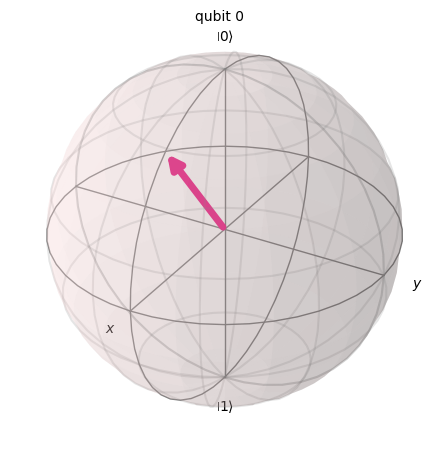

In [15]:
state = Statevector(qc)
plot_bloch_multivector(state)

In [16]:
import numpy as np
# パウリYゲート
state_list = []
for i in range(12):
  qr = QuantumRegister(1)
  cr = ClassicalRegister(1)
  qc = QuantumCircuit(qr, cr)
  qc.ry(i * np.pi/ 12, qr[0])
  state = Statevector(qc)
  state_list.append(state)

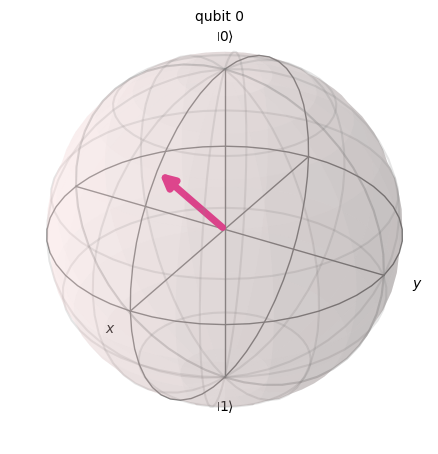

In [17]:
plot_bloch_multivector(state_list[3]) # state_listのインデックスを書き換えると回転の様子がみられます

### Zゲート
Zゲートはブロッホ球の$z$軸周りの$\pi$回転です。位相反転とも呼ばれます。

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$

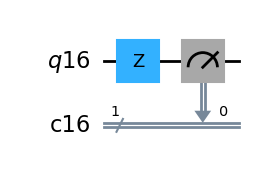

In [18]:
# パウリZゲート
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

qc = QuantumCircuit(qr, cr)
qc.z(qr[0])
qc.measure(qr[0],cr[0])
qc.draw(output='mpl')

In [19]:
run_qc_on_aer(qc)

{'0': 1024}

 ここからは重ね合わせ状態を作ってみましょう。
### Hゲート
Hadamardゲート(アダマールゲート)はブロッホ球の$x$軸と$z$軸の中間の軸周りの$\pi$回転です。
例えば$|0\rangle$にHゲートを適用すると、$\frac{|0\rangle + |1\rangle}{\sqrt{2}}$のような重ね合わせ状態を作ることができます。

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

In [20]:
# Hadamardゲート
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.measure(qr[0],cr[0])
counts = run_qc_on_aer(qc)
print(counts)

{'0': 495, '1': 529}


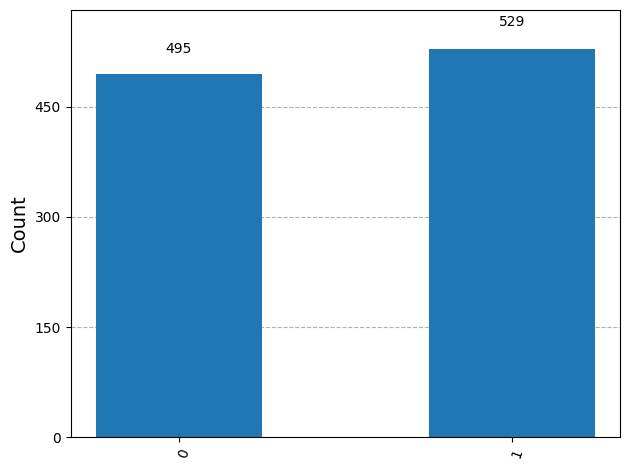

In [21]:
from qiskit.visualization import plot_histogram
# 結果をプロットすることもできます。測定ビット数が増えたときに便利です。
plot_histogram(counts)

次は複数量子ビットに対する基本操作を扱います。
### CXゲート(CNOTゲート)
CXゲートは制御NOTゲート、CNOTとも呼ばれます。CXゲートは、２つの量子ビット(制御量子ビットとターゲット量子ビットと呼びます)を入出力に持ち、制御量子ビットが|1>のときに、ターゲット量子ビットに対してビット反転(Xゲート)を行います。

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

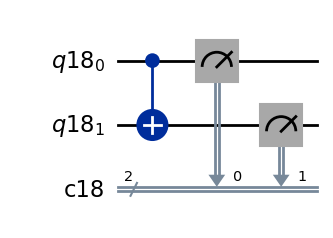

In [22]:
# CX gate
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

# qr[0]が|0>状態だと、CXゲートは何もしません。
qc.cx(qr[0],qr[1])
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])
qc.draw(output='mpl')

In [23]:
run_qc_on_aer(qc)

{'00': 1024}

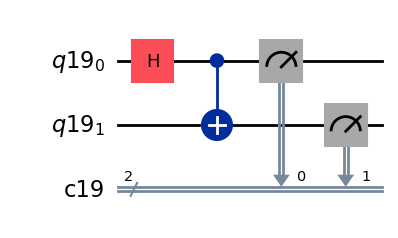

In [24]:
# CX gate
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

# qr[0]に対して好きなゲートをかけてみましょう。
qc.h(qr[0])
qc.cx(qr[0],qr[1])

qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])
qc.draw(output='mpl')

In [25]:
run_qc_on_aer(qc)

{'00': 505, '11': 519}

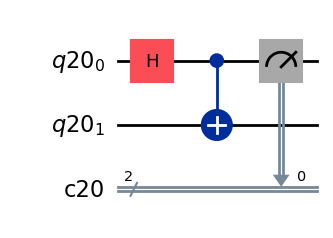

In [26]:
# CX gate
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

# qr[0]に対して好きなゲートをかけてみましょう。
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.measure(qr[0],cr[0])
qc.draw(output='mpl')

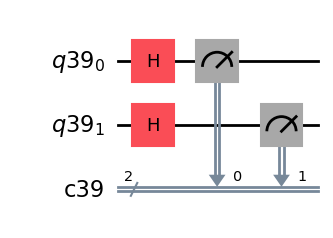

In [ ]:
# |++>状態
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)

# qr[0]に対して好きなゲートをかけてみましょう。
qc.h(qr[0])
qc.h(qr[1])
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])
qc.draw(output='mpl')

In [27]:
run_qc_on_aer(qc)

{'01': 507, '00': 517}

さらに、3量子ビットに対するゲートです。
### CCXゲート
CCXゲートはToffoliゲートとも呼ばれます。

CCXゲートは、3つの量子ビット(2つの制御量子ビットと1つのターゲット量子ビット)を入出力に持ち、制御量子ビットが2つとも|1>のときに、ターゲット量子ビットに対してビット反転(Xゲート)を行います。

$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
\end{pmatrix}$

Qiskitで使用できる様々な量子ゲートは以下を参照してください。
https://docs.quantum.ibm.com/api/qiskit/circuit_library#standard-gates

## 古典の論理ゲートを量子ゲートで作成する
古典の論理ゲートを量子ゲートで作成してみましょう。
真理値表と量子回路による表現を以下に示します。なお、量子レジスタをq、古典レジスタをcとし、測定結果を作成する論理ゲートの出力とします。

### NOTゲート
先述の通り、XゲートをNOTゲートとみなすことができます。 真理値表は以下のようになります。


|入力|出力|
|--|--|
|0|1|
|1|0|

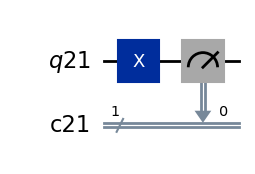

In [28]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.x(q[0])
qc.measure(q[0], c[0])
qc.draw(output='mpl')

### ANDゲート
ANDゲートの真理値表は以下のようなものです。

|入力A|入力B|出力|
|--|--|--|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

CCXゲートを用いると、制御量子ビット2つに対するANDゲートの結果をターゲット量子ビットに得られます。

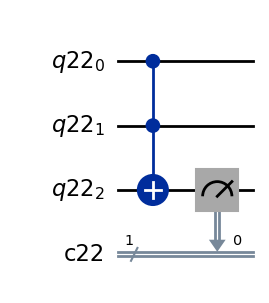

In [29]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
# q[0],q[1]に任意の古典状態をエンコードします
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### NANDゲート
NANDゲートはANDゲートにNOTゲートを適用したものと捉えることができます。

|入力A|入力B|出力|
|--|--|--|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

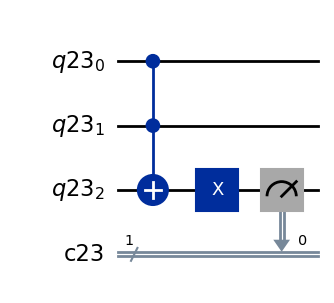

In [30]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### ORゲート

|入力A|入力B|出力|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

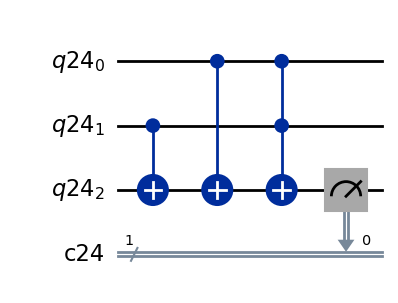

In [31]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### XORゲート
|入力A|入力B|出力|
|--|--|--|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

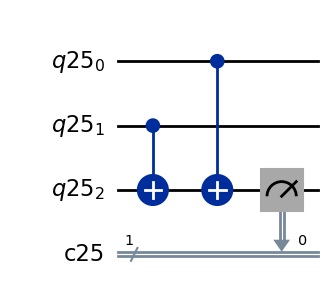

In [32]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

### NORゲート

|入力A|入力B|出力|
|--|--|--|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|0|

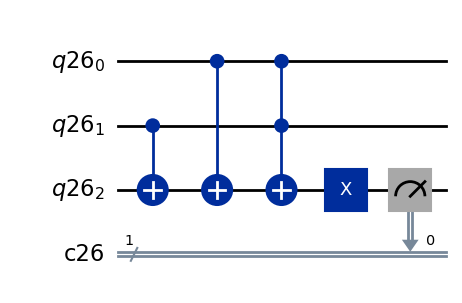

In [33]:
q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw(output='mpl')

# 加算器

加算器は足し算を行う論理回路です。

今回は最もシンプルな加算器である半加算器と全加算器を用いた加算器に関して考えます。

## 半加算器
半加算器は、２進数を2つ与えられたとき、一番下の位の値どうしの加算を行います。
1ビットの情報2つ(入力A,B)が入力として与えられ、桁上げ出力(Carry out)、出力（Sum、和）の２つを出力に持ちます。
この桁上げ出力の情報は、後述の全加算器の入力の１つとして１つ上の位の値を求めるために用いられます。


半加算器は以下の様な真理値表の論理回路で表すことができます。

|入力A|入力B|桁上げ出力C|出力S|
|-----------|------------|------------|------------|
|0|0|0|0|
|0|1|0|1|
|1|0|0|1|
|1|1|1|0|

この真理値表を見ると、桁上げ出力Cは入力Aと入力Bに対してANDを適用したものであること、出力Sは入力Aと入力Bに対してXORを適用したものであることがわかります。
ANDとXORに関してはすでに作成済みなので、以下のように組み合わせて半加算器の量子回路が作成できます。

なお、量子レジスタをq, 古典レジスタcとし、入力A, Bをq[0],q[1]に、桁上げ出力C,出力Sをq[2], q[3]に割り振ります。
また、出力結果はc[1], c[0]の順になっていることに注意して下さい。

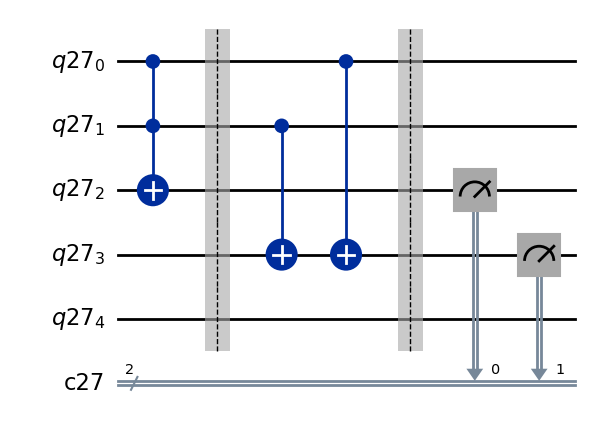

In [34]:
#各レジスタ、量子回路を宣言
q = QuantumRegister(5)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

#AND
qc.ccx(q[0], q[1], q[2])

qc.barrier(q)

#XOR
qc.cx(q[1], q[3])
qc.cx(q[0], q[3])

qc.barrier(q)

#Carry out
qc.measure(q[2], c[0])
#Sum
qc.measure(q[3], c[1])
qc.draw(output='mpl')

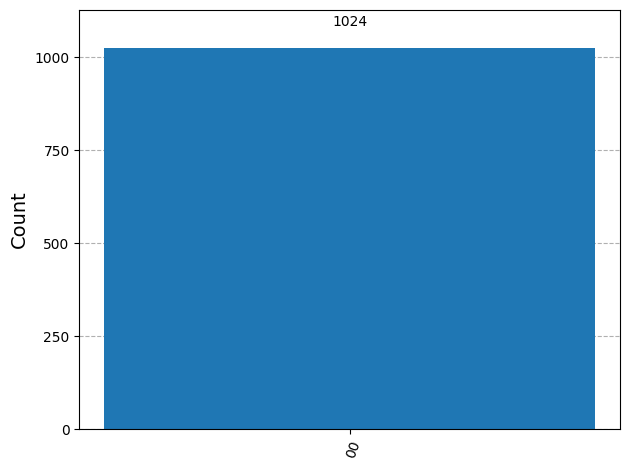

In [35]:
counts =run_qc_on_aer(qc)
plot_histogram(counts)

# 問題
全加算器は、下の位からの桁上げを含む加算器である。
全加算器を量子回路で表現せよ。なお、真理値表は以下のようになる。

|入力A|入力B|桁上げ入力X|桁上げ出力C|出力S|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|0|1|
|0|1|0|0|1|
|0|1|1|1|0|
|1|0|0|0|1|
|1|0|1|1|0|
|1|1|0|1|0|
|1|1|1|1|1|


なお、量子レジスタをq, 古典レジスタcとする。また、入力A, B, 桁上げ入力Xをそれぞれq[0], q[1], q[2]に与えられるものとし、測定結果のc[0]に桁上げ出力C、c[1]に出力Sが出力されるようにすること。

入力000から111までの出力結果をカンマで区切ったものと、入力000の全加算器に対してunroller(後述)を用いて単一量子ビットゲート(u3)とCXに分解した結果を出力せよ   
例  
00,01,01,10,01,...改行  
u3: 27, cx: 24

## トランスパイラを用いた量子コストの導出
プログラム(量子回路)を評価する手法がいくつか存在します。

1. 量子ビット数
2. 深さ
3. 実行速度
4. 命令数

これらはどれも量子計算の結果やスループットなどに影響する重要な尺度ですが、今回のQuantum Challengeでは特に4の命令数を指標として、以下のようにプログラムを評価しています。今回の手法で用いる値をコストと呼称します。

コスト $=$ 単一量子ビットゲートの数 $+$ CXゲートの数 $\times 10$

任意の量子回路は単一量子ビットゲート(1量子ビットに対する命令)と2量子ビットゲートに対する命令に分解して同等な回路を構築することができます。また、現代のデバイスではCXゲートの方がノイズが乗りやすいので10倍の重み付けをしています。

トランスパイラと呼ばれるプログラムを用いることで、皆さんのお手元でもこのコストを導出することができます。
例えば、以下のような量子回路があったとします。

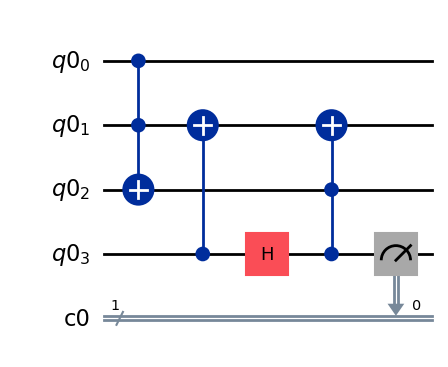

In [36]:
q = QuantumRegister(4, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.cx(q[3], q[1])
qc.h(q[3])
qc.ccx(q[3], q[2], q[1])
qc.measure(q[3],c[0])
qc.draw(output='mpl')

In [37]:
# 回路にどのゲートがいくつ使われたかを確かめることができます
qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])

この量子回路には単一量子ビットゲートやCXゲート以外のゲート(CCXゲート)が入っていますが、以下のようにunroller内で指定したゲートのみに分解することができます。

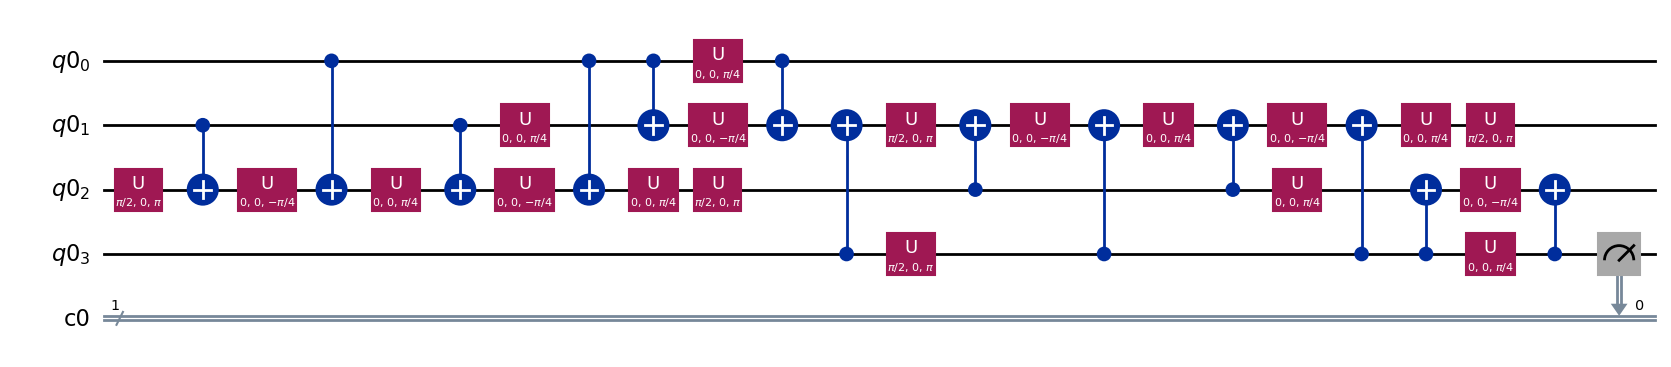

In [38]:
from qiskit import transpile

decomposed_qc = transpile(qc, basis_gates=['u', 'cx'], optimization_level=0)
decomposed_qc.draw(output='mpl')

In [39]:
# より実機に近い命令セット(ゲート集合)に分解することで現実的な回路のコストを見積もることができます。
decomposed_qc.count_ops()

OrderedDict([('u', 19), ('cx', 13), ('measure', 1)])

In [42]:
# 他の指標も簡単に確認できます
# 回路の深さ
num_q = decomposed_qc.num_qubits
depth = decomposed_qc.depth()
print(num_q)
print(depth)

4
24


# CHSH 不等式
エンタングルした量子ビットのもつ相関が古典を超える

## 量子もつれ
2つの量子が非局所的な相関を持つ
* 非局所性: 片方の状態を観測すると, もう片方の状態がその瞬間距離に関係なく決定
* アインシュタイン、ポドルスキー、ローゼンはこの現象が相対性理論に反すると主張(EPRパラドックス)
    * "片方の状態の決定がもう片方の状態の決定を瞬時に行うのであるならば、情報が光よりも早く伝わってしまうのではないか"
    * "もつれの生成時には既に状態は決定していたのではないか"(隠れた変数理論)

## Bell不等式
1964年：ジョン・スチュアート・ベルが局所実在論が満たすべき不等式(Bellの不等式)を提案
* Bellの不等式: 「量子力学が主張するような遠隔相互作用」を認めない理論を作った場合に成り立つ条件を示した不等式

* 2つの粒子を離れた場所に飛ばし、それぞれの場所でスピンを同時(測定結果を他方に与える時間よりも速ければ良い)に測定する。
* 測定する時の角度を、ランダムに変える(もう片方からは測定角度も結果もわからない)

## CHSH不等式
1969年:クラウザー, ホルネ, シモニー, ホルトがBellの不等式を一般化(CHSH不等式)
$$S = |\langle AB \rangle - \langle aB \rangle + \langle Ab \rangle + \langle ab \rangle| \leqq 2$$  A,a,B,bは測定角度
なお、$\langle AB \rangle$はそれぞれA,Bの角度で測定した時の相関
$$\langle AB \rangle = P_{00} + P_{11} - P_{01} -P_{10}$$



* 満たされる→EPRが正しい

$$
|AB+aB-Ab+ab|\\
=|(A+a)B-(A-a)b|\\
\leqq|(A+a)B|+|(A-a)b|\\
=|A+a||B|+|A-a||b|\\
\leqq|A+a|+|A-a|\\
$$

古典だと2以下になる。
* 満たされない→量子もつれは非局所性を持つ
* $2\sqrt{2}$を超える→実験の失敗(チレルソン限界)

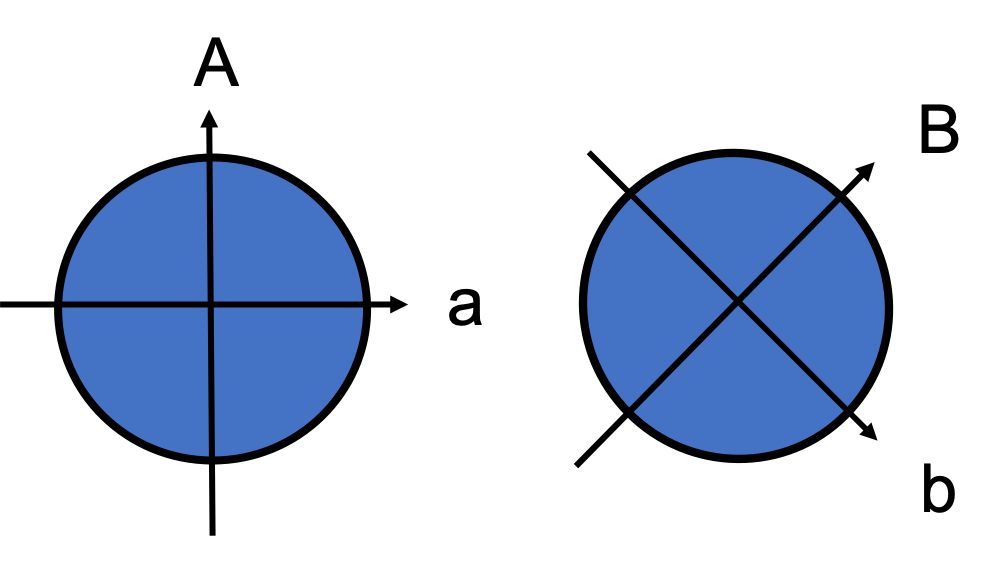

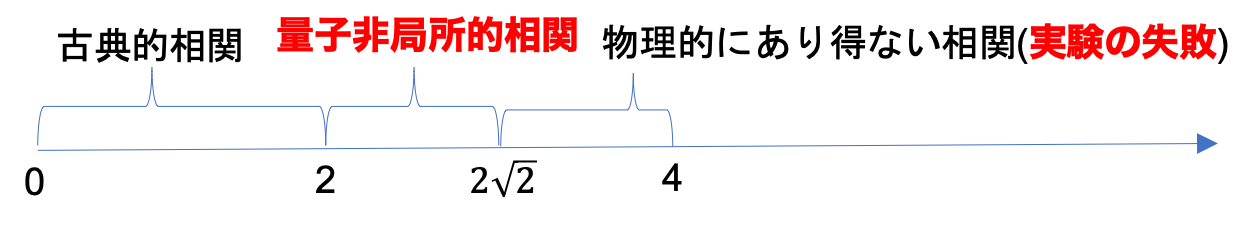

In [44]:
from IPython.display import Image, display_png
# png_file: str
display_png(Image("/basis.png"))
display_png(Image("/entangle.png"))

## 準備
ベル状態　もっとも単純な量子もつれ状態。２量子ビットからなり、4種類ある。

$$|\Psi^+ \rangle = \frac{|00\rangle+|11\rangle}{\sqrt{2}}$$
$$|\Psi^- \rangle = \frac{|00\rangle-|11\rangle}{\sqrt{2}}$$
$$|\Phi^+ \rangle = \frac{|01\rangle+|10\rangle}{\sqrt{2}}$$
$$|\Phi^+ \rangle = \frac{|01\rangle-|10\rangle}{\sqrt{2}}$$

ここで、$|01\rangle$は$|0\rangle \otimes|1\rangle$ : １つ目の量子ビットが0状態、2つ目の量子ビットが1状態、という意味

$|\Phi^+ \rangle$は以下のように作成できる
* Hゲートで$\frac{|0 \rangle + |1 \rangle}{\sqrt{2}}\otimes |0\rangle$
* Xゲートで$\frac{|0 \rangle + |1 \rangle}{\sqrt{2}}\otimes |1\rangle$
* CNOTゲート で完成

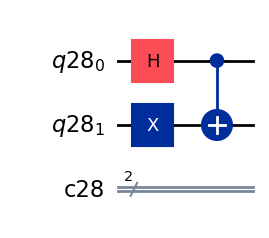

In [46]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
def make_phi_plus(qubit0, qubit1):
    qc.h(qubit0)
    qc.x(qubit1)
    qc.cx(qubit0, qubit1)

make_phi_plus(q[0],q[1])
qc.draw(output='mpl')

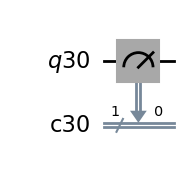

In [48]:
# 異なる基底での測定を考えます。
# まずは基本のZ測定です。

q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
def A_basis(qubit, bit):
    qc.measure(qubit,bit)

A_basis(q[0],c[0])
qc.draw(output='mpl')

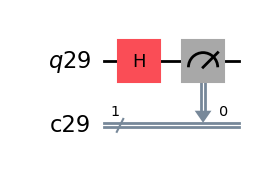

In [47]:
# Qiskitの基本的な測定はZ基底ですが、他の基底もパウリゲートを使うことで実現できます。

# X測定
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
def a_basis(qubit, bit):
    qc.h(qubit)
    qc.measure(qubit,bit)

a_basis(q[0],c[0])
qc.draw(output='mpl')

$\frac{Z+X}{\sqrt{2}}$ 測定

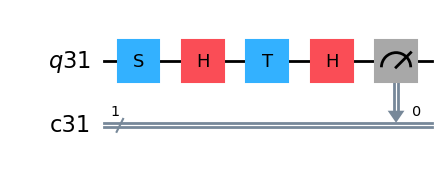

In [49]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
def B_basis(qubit, bit):
    qc.s(qubit)
    qc.h(qubit)
    qc.t(qubit)
    qc.h(qubit)
    qc.measure(qubit,bit)
B_basis(q[0],c[0])
qc.draw(output='mpl')

$\frac{Z-X}{\sqrt{2}}$ 測定

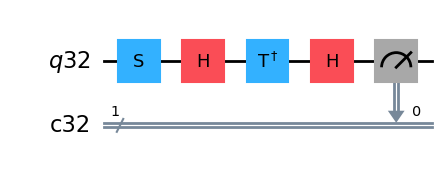

In [50]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
def b_basis(qubit, bit):
    qc.s(qubit)
    qc.h(qubit)
    qc.tdg(qubit)
    qc.h(qubit)
    qc.measure(qubit,bit)

b_basis(q[0],c[0])
qc.draw(output='mpl')

$$\langle MN \rangle=𝑃_{00}+𝑃_{11}−𝑃_{01}−𝑃_{10}$$
* $𝑃_{𝑚𝑛}$は、$状態_{𝑚𝑛}$が観測される確率(推定値)

# **AB測定**

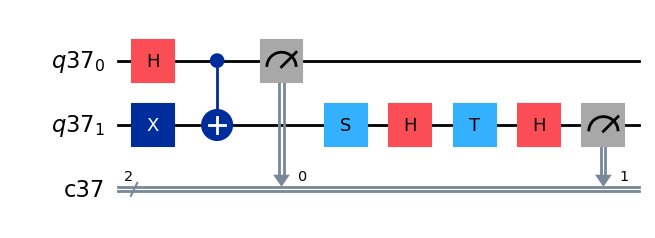

In [67]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
make_phi_plus(q[0],q[1])
A_basis(q[0],c[0])
B_basis(q[1],c[1])
qc.draw(output='mpl')

In [68]:
countAB = run_qc_on_aer(qc)
print(countAB)

{'11': 78, '00': 66, '10': 445, '01': 435}


In [69]:
AB = (countAB['00'] + countAB['11'] - countAB['01'] -countAB['10'])/1024
print(AB)

-0.71875


# **aB測定**

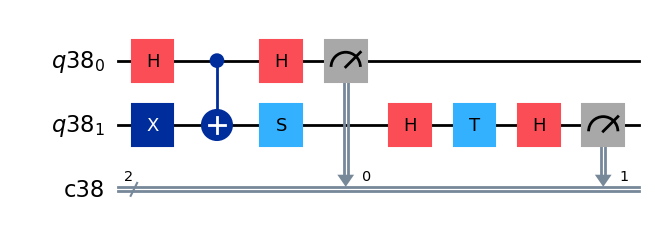

In [70]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
make_phi_plus(q[0],q[1])
a_basis(q[0],c[0])
B_basis(q[1],c[1])
qc.draw(output='mpl')

In [71]:
countaB = run_qc_on_aer(qc)
print(countaB)

{'01': 88, '11': 422, '10': 81, '00': 433}


In [72]:
aB = (countaB['00'] + countaB['11'] - countaB['01'] -countaB['10'])/1024
print(aB)

0.669921875


# **Ab測定**

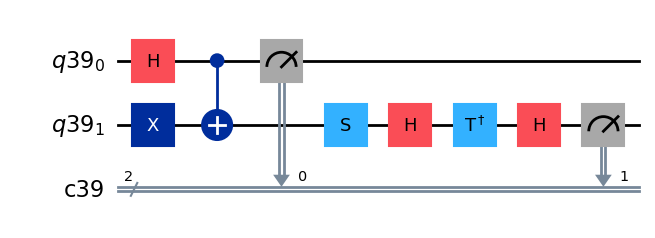

In [73]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
make_phi_plus(q[0],q[1])
A_basis(q[0],c[0])
b_basis(q[1],c[1])
qc.draw(output='mpl')

In [74]:
countAb = run_qc_on_aer(qc)
print(countAb)

{'11': 75, '01': 458, '00': 90, '10': 401}


In [75]:
Ab = (countAb['00'] + countAb['11'] - countAb['01'] -countAb['10'])/1024
print(Ab)

-0.677734375


# **ab測定**

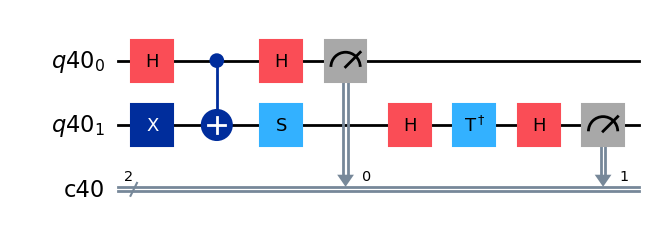

In [77]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
make_phi_plus(q[0],q[1])
a_basis(q[0],c[0])
b_basis(q[1],c[1])
qc.draw(output='mpl')

In [78]:
countab = run_qc_on_aer(qc)
print(countab)

{'11': 86, '01': 435, '00': 80, '10': 423}


In [79]:
ab = (countab['00'] + countab['11'] - countab['01'] -countab['10'])/1000
print(ab)

-0.692


In [80]:
S = AB - aB  + Ab + ab
print(abs(S))

2.75840625


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# これ以降のタブは今回の演習では使いません。興味がある人向けです。
# IBMは無料アカウントでも量子コンピュータの実機使用権を配っているので、興味がある人は後で実機も試してみましょう。
# 上の回路を量子計算機で実行してみましょう。まず、https://quantum.ibm.com/ でアカウントを作成し、Dashboard(画像)の右上のAPI TOKENを取得してください。
from qiskit_ibm_runtime import QiskitRuntimeService
# <MY_IBM_QUANTUM_TOKEN>を自分のAPIトークンで置き換えて実行してください。
service = QiskitRuntimeService(
    channel="ibm_quantum", instance="ibm-q/open/main", token="<MY_IBM_QUANTUM_TOKEN>"
)

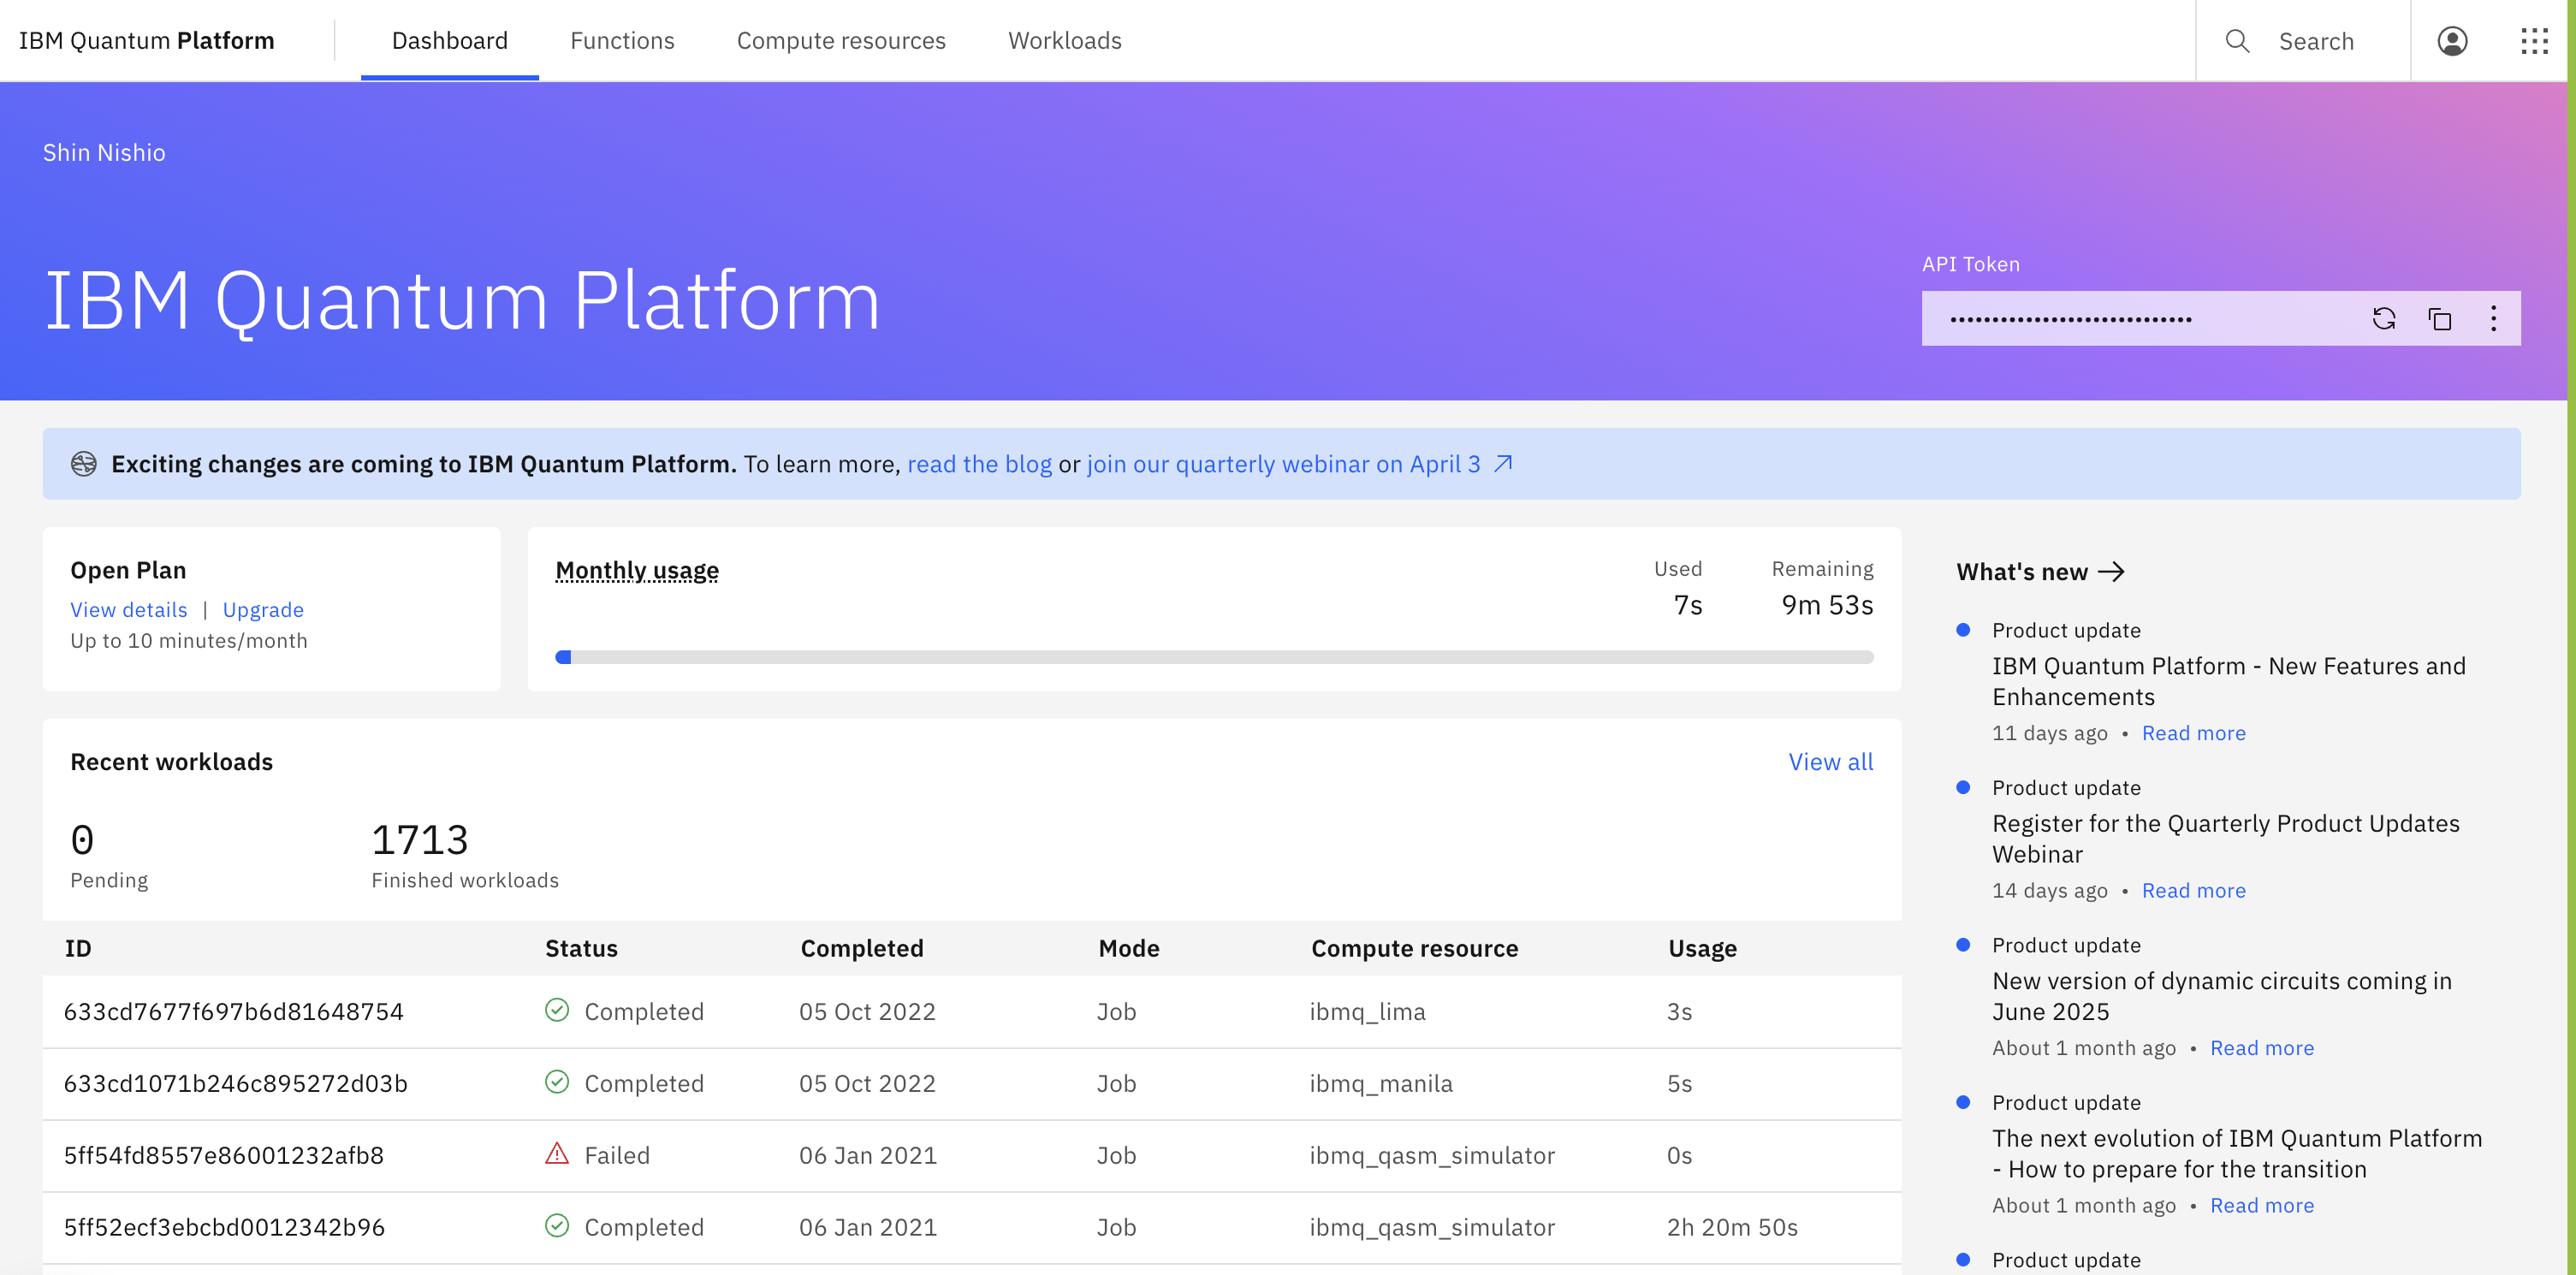


In [ ]:
import numpy as np
from qiskit.circuit.library import iqp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.quantum_info import random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
# service = QiskitRuntimeService()
n_qubits = 2 # 必要な量子ビット数

backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=n_qubits
)

qr = QuantumRegister(2)
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

sampler = Sampler(backend)
job = sampler.run([isa_circuit])
result = job.result()

# Get results for the first (and only) PUB
pub_result = result[0]

print(f" > First ten results: {pub_result.data.meas.get_bitstrings()[:10]}")

 > First ten results: ['11', '00', '00', '11', '11', '11', '11', '11', '11', '00']
